# 📦 Importing Required Libraries

In this section, we import the essential Python libraries required for data manipulation, numerical operations, and data visualization.

- **NumPy**: Used for numerical computations.
- **Pandas**: Used for data manipulation and analysis.
- **Matplotlib**: Used for data visualization and plotting.


In [6]:
import numpy as np          # For numerical computations and array operations
import pandas as pd         # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization


# 📂 Loading and Exploring the Dataset

In this section, we:

- Load the dataset into a Pandas DataFrame
- Display the first few rows of the dataset
- Generate statistical summaries
- Visualize the distribution of numerical features

This step helps us understand the structure, scale, and distribution of the data before applying clustering algorithms.


In [7]:
df = pd.read_csv("../../data/Customer.csv")

# Display first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Statistical Summary
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


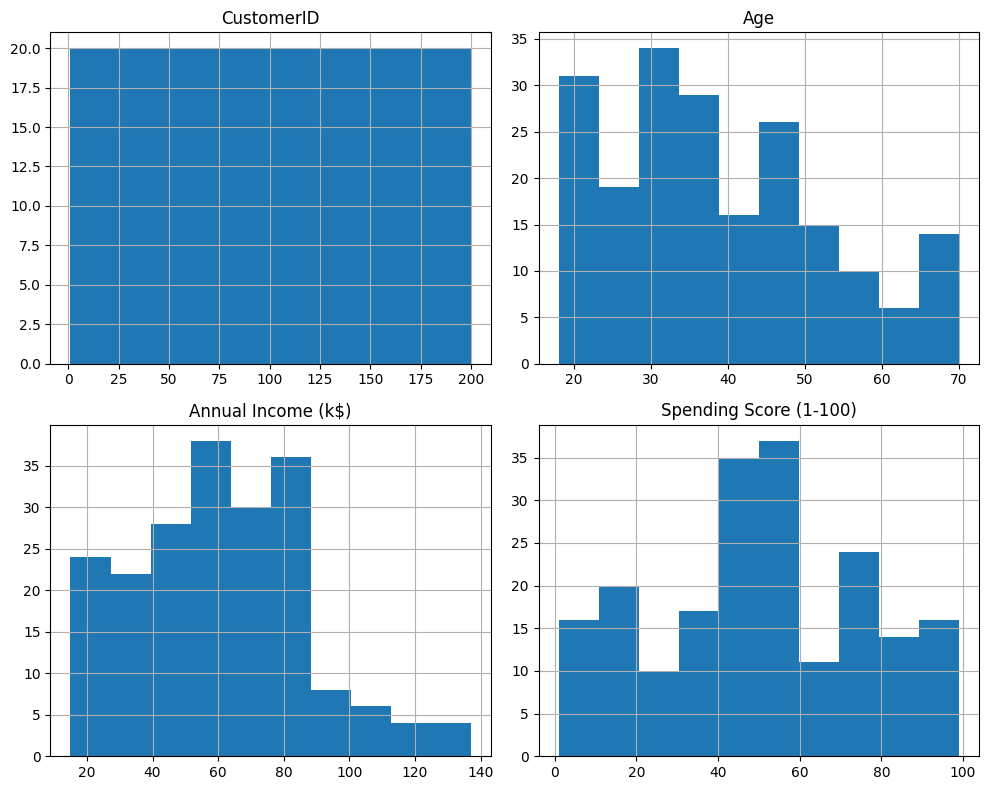

In [9]:
# Feature Distribution
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

In [10]:
# Check dataset information
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 🔄 Data Preprocessing

Clustering algorithms require numerical input features.  
Since the **Gender** column is categorical (Male/Female), we convert it into numerical format.

Mapping:
- Male → 0
- Female → 1

This transformation allows the algorithm to process the feature correctly.


In [11]:
# Encode Categorical Feature (Gender)
df['Gender'] = df['Gender'].replace({
    'Male': 0,
    'Female': 1
})

C:\Users\Mohammad Hossein\AppData\Local\Temp\ipykernel_7548\850620596.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({


# 📏 Feature Selection and Scaling

Before applying K-Means clustering, we need to:

1. Select relevant numerical features
2. Remove non-informative columns (e.g., CustomerID)
3. Scale the features

Why scaling is important?

Clustering algorithms such as **K-Means** are distance-based.  
If features are on different scales (e.g., Age vs Annual Income),  
the algorithm may give more importance to features with larger magnitudes.

We use **StandardScaler** to standardize the features:
- Mean = 0
- Standard Deviation = 1


In [12]:
from sklearn.preprocessing import StandardScaler
# Feature Selection
# Remove CustomerID (index 0) and select relevant features
X = df.iloc[:, 1:].values

# Replace any potential NaN values (safety step)
X = np.nan_to_num(X)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display scaled data
X_scaled


array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [ 0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [ 0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [ 0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [ 0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [ 0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [ 0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [ 0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [-1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [-1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [ 0.88640526, -0.

# 🤖 K-Means Clustering

In this section, we apply the **K-Means clustering algorithm** to segment customers into distinct groups.

Key Parameters:

- **n_clusters**: Number of clusters (set to 4)
- **init = "k-means++"**: Smart centroid initialization to improve convergence
- **n_init = 20**: Run the algorithm 20 times with different centroid seeds and select the best result

The model is trained on the scaled dataset.


In [13]:
# Apply K-Means Clustering

from sklearn.cluster import KMeans

# Define number of clusters
cluster_num = 4

# Initialize K-Means model
kmeans = KMeans(
    init="k-means++",
    n_clusters=cluster_num,
    n_init=20,
    random_state=42  # for reproducibility
)

# Fit model on scaled data
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

# Display cluster assignments
labels


array([2, 2, 3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 3, 0, 1, 2, 3, 2, 1, 0, 1, 2,
       3, 2, 3, 2, 3, 2, 3, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 0, 3, 2, 1, 0,
       3, 0, 3, 0, 0, 0, 3, 2, 0, 1, 3, 1, 3, 1, 0, 1, 1, 2, 3, 3, 1, 2,
       3, 3, 2, 0, 1, 3, 3, 3, 1, 2, 3, 1, 0, 3, 1, 2, 1, 3, 0, 1, 3, 0,
       0, 3, 3, 2, 1, 3, 0, 2, 3, 0, 1, 2, 0, 3, 1, 2, 1, 0, 3, 1, 1, 1,
       1, 0, 3, 2, 0, 0, 3, 3, 3, 3, 2, 3, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2,
       0, 0, 1, 0, 3, 2, 1, 0, 3, 2, 0, 0, 1, 2, 1, 0, 3, 2, 1, 2, 3, 0,
       3, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 3, 0,
       1, 2, 1, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 0, 3, 0, 1, 0, 3, 0, 3, 2,
       1, 2])

# 📊 Cluster Profiling and Analysis

After assigning cluster labels to each customer,  
we analyze the characteristics of each cluster by calculating the mean values of features within each group.

This helps us understand:

- Customer behavior patterns
- Income distribution per cluster
- Spending habits
- Age distribution

Cluster profiling is a crucial step in customer segmentation projects.


In [14]:
# Add Cluster Labels to DataFrame

df["Cluster_KMeans"] = labels

# Display updated DataFrame
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,3
3,4,1,23,16,77,0
4,5,1,31,17,40,3


In [15]:
# Cluster Profiling (Mean values per cluster)

cluster_summary = df.groupby("Cluster_KMeans").mean()

cluster_summary

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster_KMeans,,,,,
0,101.910714,1.0,28.392857,60.428571,68.178571
1,104.958333,0.0,49.437500,62.416667,29.208333
2,103.375000,0.0,28.250000,62.000000,71.675000
3,93.214286,1.0,47.803571,58.071429,34.875000


# 📈 Cluster Visualization

To better understand the segmentation results,  
we visualize customers based on:

- Age
- Annual Income

Each point represents a customer.
- Color indicates the assigned cluster
- Size reflects the Spending Score

This visualization helps interpret behavioral patterns across clusters.


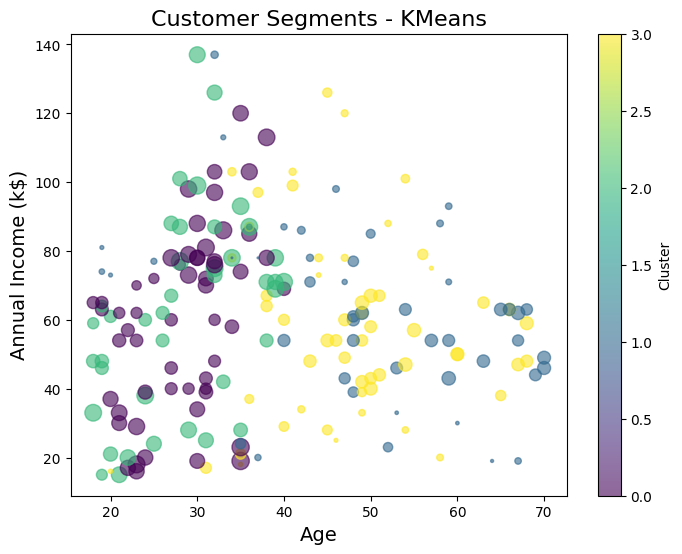

In [16]:
# Cluster Visualization

# Define marker size based on Spending Score
area = np.pi * (df["Spending Score (1-100)"]) / 2

plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    df["Age"],
    df["Annual Income (k$)"],
    s=area,
    c=df["Cluster_KMeans"],
    cmap="viridis",
    alpha=0.6
)

plt.xlabel("Age", fontsize=14)
plt.ylabel("Annual Income (k$)", fontsize=14)
plt.title("Customer Segments - KMeans", fontsize=16)

plt.colorbar(scatter, label="Cluster")
plt.show()

# ✅ Choosing the Optimal Number of Clusters (Elbow & Silhouette)

Selecting the right number of clusters (**K**) is critical for K-Means.

We evaluate different values of K using:
- **Elbow Method (Inertia / WCSS)**: measures within-cluster variance
- **Silhouette Score**: measures how well-separated the clusters are

Higher silhouette score is better, while inertia should show a clear "elbow".


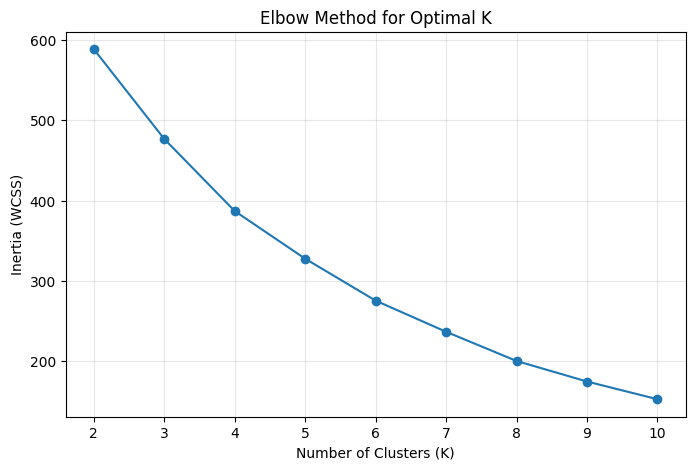

In [18]:
from sklearn.cluster import KMeans

inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, init="k-means++", n_init=20, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True, alpha=0.3)
plt.show()

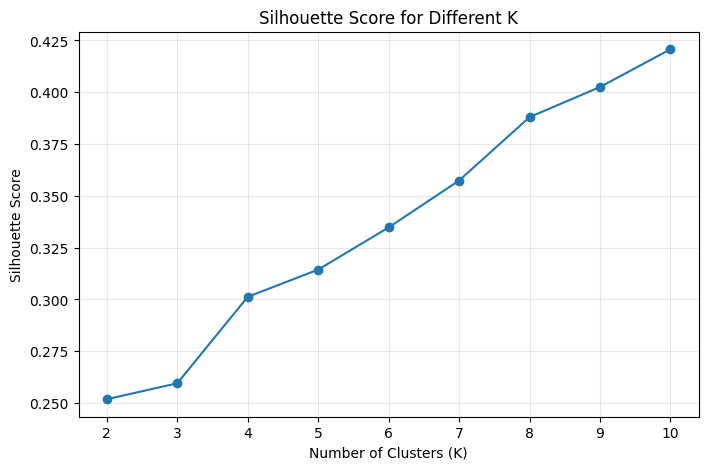

Best K based on Silhouette: 10
Best Silhouette Score: 0.42076374869477745


In [19]:
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, init="k-means++", n_init=20, random_state=42)
    labels_k = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels_k))

plt.figure(figsize=(8, 5))
plt.plot(list(K_range), sil_scores, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K")
plt.grid(True, alpha=0.3)
plt.show()

best_k = list(K_range)[int(np.argmax(sil_scores))]
print("Best K based on Silhouette:", best_k)
print("Best Silhouette Score:", max(sil_scores))

# 🚀 Final K-Means Model (Using Optimal K)

Based on the evaluation (Elbow & Silhouette), we train the final K-Means model using the selected optimal number of clusters and assign a cluster label to each customer.

In [20]:
optimal_k = best_k  # or manually set it if you prefer (e.g., 4)

kmeans_final = KMeans(
    n_clusters=optimal_k,
    init="k-means++",
    n_init=20,
    random_state=42
)

df["Cluster_KMeans"] = kmeans_final.fit_predict(X_scaled)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KMeans
0,1,0,19,15,39,1
1,2,0,21,15,81,1
2,3,1,20,16,6,2
3,4,1,23,16,77,8
4,5,1,31,17,40,2


In [21]:
cluster_profile = df.groupby("Cluster_KMeans").mean(numeric_only=True)
cluster_counts = df["Cluster_KMeans"].value_counts().sort_index()

print("Cluster Counts:\n", cluster_counts)
cluster_profile

Cluster Counts:
 Cluster_KMeans
0    26
1    24
2    14
3    21
4    26
5    19
6    25
7    18
8    13
9    14
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster_KMeans,,,,,
0,71.653846,0.000000,58.846154,48.692308,39.846154
1,56.083333,0.000000,25.250000,41.250000,60.916667
2,22.857143,0.928571,41.214286,26.071429,20.142857
3,163.333333,1.000000,32.190476,86.047619,81.666667
4,83.923077,1.000000,54.153846,54.230769,48.961538
5,161.105263,0.000000,38.473684,85.894737,14.210526
6,92.400000,1.000000,27.960000,57.360000,47.120000
7,160.444444,0.000000,33.277778,87.111111,82.666667
8,22.769231,1.000000,25.461538,25.692308,80.538462


# 🎨 2D Visualization (Income vs Spending Score)

A common and interpretable visualization for this dataset is plotting:
- Annual Income
- Spending Score

This provides a clear view of customer groups in terms of purchasing power and behavior.

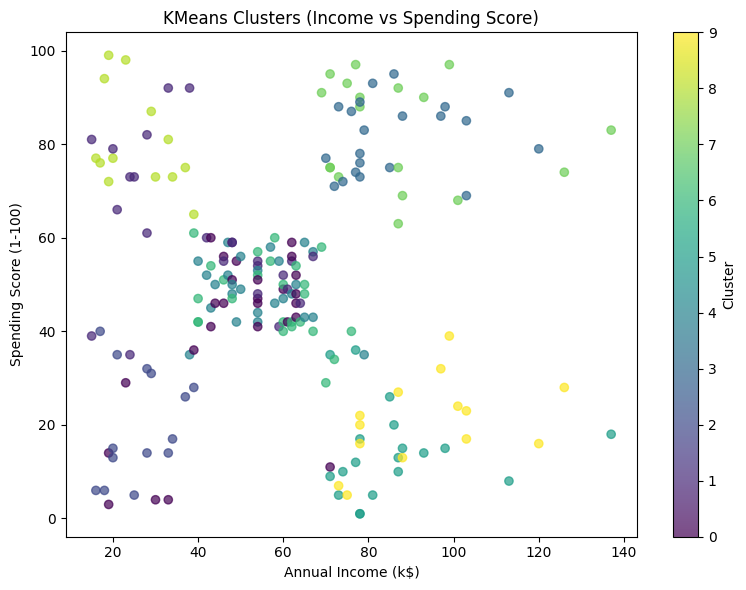

In [22]:
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=df["Cluster_KMeans"],
    alpha=0.7
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("KMeans Clusters (Income vs Spending Score)")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()